In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img):
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)

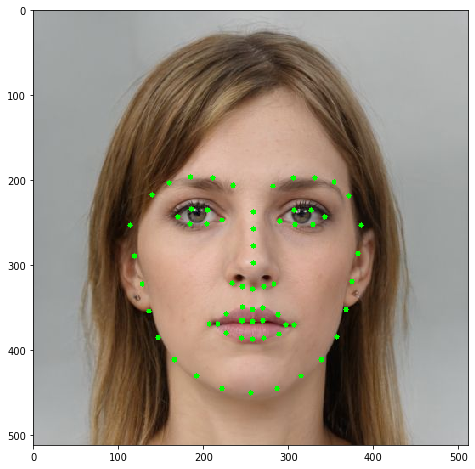

In [13]:
import random
import numpy as np
import cv2 as cv

frame1 = cv.imread(('../DATA/face.jpg'))

#frame = np.vstack((frame1,frame1))
facemark = cv.face.createFacemarkLBF()
try:
    facemark.loadModel(cv.samples.findFile('../DATA/lbfmodel.yaml'))
except cv.error:
    print("Model not found\nlbfmodel.yaml can be download at https://github.com/kurnianggoro/GSOC2017/blob/master/data/lbfmodel.yaml")

    
cascade = cv.CascadeClassifier('../haarcascades/lbpcascade_frontalface_improved.xml')
if cascade.empty() :
    print("cascade not found")
    exit()
faces = cascade.detectMultiScale(frame1, 1.05,5,cv.CASCADE_SCALE_IMAGE, (30, 30)) #, 1.05,  3, cv.CASCADE_SCALE_IMAGE, (30, 30)
ok, landmarks = facemark.fit(frame1, faces=faces)

for marks in landmarks:
    color = (0,255,0)
    cv.face.drawFacemarks(frame1, marks, color)
display(frame1)